# Taller 3

## Métodos Computacionales 2

Instrucciones: Suba el jupyter notebook **.ipynb** en la actividad de bloque neon. El archivo debe ser nombrado ApellidoNombreApellidoNombre_Taller3.ipynb, con su primer Apellido y Nombre de cada integrante de la pareja. **El archivo debe poder correr en google colab**

Si un ejercicio demora **más de 10 segundos** en correr se considerará **incorrecto**.

La simulación no debe demorar más de **30 segundos** en compilar y correr.

No modifique el cuaderno, ni los modos de lectura de los archivos.

**Entrega: Viernes 22 de Septiembre 11:59 pm**

## Librerias

In [55]:
import time
import numpy as np
import scipy as sci
import scipy.integrate as integrate
import sympy as sym
from sympy import symbols
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import animation
plt.style.use('dark_background')

In [56]:
from matplotlib import rc
rc("animation", html = "jshtml")
sym.init_printing()
#matplotlib.rcParams['animation.embed_limit'] = 2**128

## Problema 1

El siguiente codigo de C++ se obtienen los puntos de un tiro parabólico con los siguientes parametros,

$x_0 = 0\text{ m }$,
$y_0 = 10\text{ m }$,
$v_{x0} = 10\text{ m/s }$,
$v_{y0} = 10\text{ m }$,
$t_f = 2.733 \text{ s }$,
$dt = 0.01 \text{ s }$

y tomando gravedad como,

$g = 10 \text{ m/s }^2$

Además el código en python, y el script gráfican en matplotlib estos puntos,

problema: Modificar el código de `C++` para incluir un tiro parabólico con fricción del aire y con las mismas condiciones iniciales usando el método de Runge-Kutta de 4to orden, al final debe gráficar el tiro parabólico normal y el tiro parabólico con fricción en la misma gráfica.

Tome el coeficiente de fricción del aire y la masa como se definen en el archivo de C++.

$b = 0.2 \text{ kg/s }$,
$m = 1 \text{ kg }$.

El método de Runge-Kutta para ecuaciones diferenciales de segundo orden tiene la forma,

 ![](https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/runge%20kutta%202nd%20order.png)


In [57]:
%%writefile parabolico.cpp

#include <iostream>
#include <vector>
#include <fstream>
#include <cmath>
#define g 10.0
#define m 1
#define b 0.2

using namespace std;

int main() {
    float x_init = 0;
    float y_init = 10;
    float vx_init = 10;
    float vy_init = 10;

    float dt = 0.01;
    float t_total = 2.733;
    cout << "total_time:" <<  t_total << endl;
    int N = t_total/dt;
    cout << N;

    double pos_x[N];
    double pos_y[N];

    for(int i = 0; i <N; i++){
        pos_x[i] = vx_init*i*dt;
        pos_y[i] = y_init + vy_init*i*dt - 0.5*g*pow(i*dt, 2);
    }

    for(int i = 0; i <N; i++){
        cout << pos_x[i] << " ";
        cout << pos_y[i] << " ";
    }

    std::ofstream myfile;
    myfile.open ("x_values.csv");
    myfile << "x,y\n";
    for(int i = 0; i <N; i++){
        myfile << pos_x[i] << ",";
        myfile << pos_y[i] << "\n";
    }
    myfile.close();

    // su codigo aqui

    double x = x_init;
    double y = y_init;
    double vx = vx_init;
    double vy = vx_init;    
    
    
    double pos_x1[N];
    double pos_y1[N];
    
    double k1x;
    double k1y;
    double l1x;
    double l1y;
    

    double k2x;
    double k2y;
    double l2x;
    double l2y;
    
    double k3x;
    double k3y;
    double l3x;
    double l3y;
    
    double k4x;
    double k4y;
    double l4x;
    double l4y;
    
    for (int i = 0; i < N; i++){
        
        // Método de Runge-Kutta de cuarto orden para actualizar las variables
        k1x = dt * vx;
        k1y = dt * vy;
        l1x = dt * (-b*vx/m);
        l1y = dt * (-g -(b/m)*vy);
        
        k2x = dt * (vx+(1/2)*l1x);
        k2y = dt * (vy+(1/2)*l1y);
        l2x = dt * (-b * k2x/(dt*m));
        l2y = dt * ((-b * k2y/(dt*m)) -g);
        
        k3x = dt * (vx+(1/2)*dt*l2x);
        k3y = dt * (vy+(1/2)*dt*l2y);
        l3x = dt * (-b * k3x/(dt*m));
        l3y = dt * ((-b * k3y/(dt*m)) -g);
        
        k4x = dt * (vx+dt*l3x);
        k4y = dt * (vy+dt*l3y);
        l4x = dt * (-b * k4x/(dt*m));
        l4y = dt * ((-b * k4y/(dt*m)) -g);

        vx += (1.0 / 6.0) * (l1x + 2 * l2x + 2 * l3x + l4x);
        vy += (1.0 / 6.0) * (l1y + 2 * l2y + 2 * l3y + l4y);
        x +=  (1.0 / 6.0) * (k1x + 2 * k2x + 2 * k3x + k4x);
        y +=  (1.0 / 6.0) * (k1y + 2 * k2y + 2 * k3y + k4y);
        
        pos_x1[i] = x;
        pos_y1[i] = y;
    }


    std::ofstream myfile2;
    myfile2.open ("x_values_with_friccion.csv");
    myfile2 << "x,y\n";
    for(int i = 0; i <N; i++){
        myfile2 << pos_x1[i] << ",";
        myfile2 << pos_y1[i] << "\n";
    }
    myfile2.close();
    
    return 0;
    
}





Overwriting parabolico.cpp


In [58]:
%%script bash

g++ parabolico.cpp -o parabolico
./parabolico

total_time:2.733
2730 10 0.1 10.0995 0.2 10.198 0.3 10.2955 0.4 10.392 0.5 10.4875 0.6 10.582 0.7 10.6755 0.8 10.768 0.9 10.8595 1 10.95 1.1 11.0395 1.2 11.128 1.3 11.2155 1.4 11.302 1.5 11.3875 1.6 11.472 1.7 11.5555 1.8 11.638 1.9 11.7195 2 11.8 2.1 11.8795 2.2 11.958 2.3 12.0355 2.4 12.112 2.5 12.1875 2.6 12.262 2.7 12.3355 2.8 12.408 2.9 12.4795 3 12.55 3.1 12.6195 3.2 12.688 3.3 12.7555 3.4 12.822 3.5 12.8875 3.6 12.952 3.7 13.0155 3.8 13.078 3.9 13.1395 4 13.2 4.1 13.2595 4.2 13.318 4.3 13.3755 4.4 13.432 4.5 13.4875 4.6 13.542 4.7 13.5955 4.8 13.648 4.9 13.6995 5 13.75 5.1 13.7995 5.2 13.848 5.3 13.8955 5.4 13.942 5.5 13.9875 5.6 14.032 5.7 14.0755 5.8 14.118 5.9 14.1595 6 14.2 6.1 14.2395 6.2 14.278 6.3 14.3155 6.4 14.352 6.5 14.3875 6.6 14.422 6.7 14.4555 6.8 14.488 6.9 14.5195 7 14.55 7.1 14.5795 7.2 14.608 7.3 14.6355 7.4 14.662 7.5 14.6875 7.6 14.712 7.7 14.7355 7.8 14.758 7.9 14.7795 8 14.8 8.1 14.8195 8.2 14.838 8.3 14.8555 8.4 14.872 8.5 14.8875 8.6 14.902 8.7 14.9155 8.

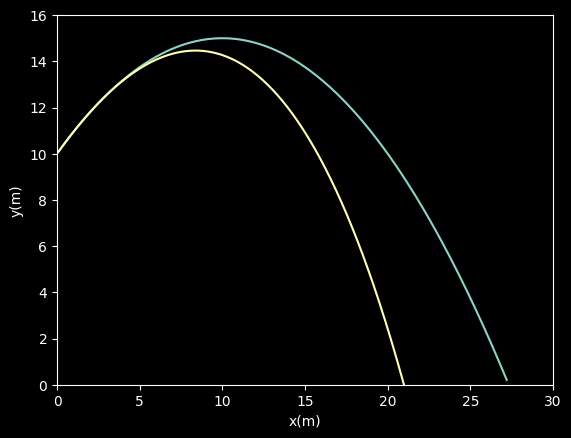

In [59]:
df = pd.read_csv("./x_values.csv")
df_damped = pd.read_csv("./x_values_with_friccion.csv")
x = np.array(df["x"])
y = np.array(df["y"])
x_damped = np.array(df_damped["x"])
y_damped = np.array(df_damped["y"])

plt.ylim([0, 16])
plt.xlim([0, 30])
plt.xlabel("x(m)")
plt.ylabel("y(m)")
plt.plot(x, y)
plt.plot(x_damped, y_damped)
plt.show()

In [60]:
%%script bash

rm parabolico x_values.csv x_values_with_friccion.csv

## Problema 2

Considere un sistema compuesto por una esfera hueca de radio $R$ y masa $M$ que gira sin deslizar la cual está conectada en su centro a un resorte con longitud natural (sin estirar) $l$ del cual cuelga una masa $m$ como se muestra en la figura.

![](https://raw.githubusercontent.com/diegour1/MetodosComputacionales2/main/Datafiles/pendulo_resorte_cuerpo_rigido.png)

Considere $l_1$, $l_2$, como se muestran en la figura, $f_r$ la fuerza de fricción entre la esfera hueca y la superficie, y $x$, y $y$ como las coordenadas de la masa $m$.

a) Demuestre que las ecuaciones de Newton y de ligadura del sistema son las siguientes,

\begin{align}
m \ddot x &= - k(l_2 - l) \sin{(\theta)} \\
m \ddot y &= - mg + k(l_2 - l) \cos{(\theta)} \\
M \ddot l_1 &= k(l_2 - l) \sin{(\theta)} - f_r \\
f_r &= \frac{2}{3}M \ddot l_1 \\
\ddot x &= \ddot l_1 + \ddot l_2 \sin{(\theta)} + 2 \dot l_2 \cos{(\theta)} \dot \theta - l_2 \sin{(\theta)} (\dot \theta) ^2 + l_2\cos{(\theta)} \ddot \theta\\
\ddot y &= - \ddot l_2 \cos{(\theta)} + 2 \dot l_2 \sin{(\theta)} \dot \theta + l_2 \cos{(\theta)} (\dot \theta) ^2 + l_2\sin{(\theta)} \ddot \theta\\
\end{align}

Sus ecuaciones y demonstración aquí,

Por sumatoria de fuerzas en m, tenemos que:
$$m\ddot y=  - mg + k(l_2 - l) \cos{(\theta)} $$
$$  m \ddot x = - k(l_2 - l) \sin{(\theta)} $$

Ahora, aplicando sumatoria de fuerzas horizontales en M, es evidente que:
$$ M \ddot l_1 = k(l_2 - l) \sin{(\theta)} - f_r $$

Por otro lado, si vemos la sumatoria de torques en M:
$$ I\alpha=f_rR$$
$$ \frac{2}{3}MR^2(\dot\omega) = f_r R$$
Por a condición de rodamiento sin deslizar:
$$ V_M=\omega R$$
$$ \omega =\frac{V_M}{R}=\frac{\dot l_1}{R}$$
Reemplazando en la ecuación de los torques:
$$ \frac{2}{3}MR^2(\frac{\ddot l_1}{R}) = f_r R $$
$$ f_r= \frac{2}{3}M \ddot l_1 $$
.
Notemos que se puede expresar el desplazamiento en x como:
$$ x=l_1+ l_2sin(\theta) $$

$$ y= -l_2 cos(\theta) $$

Derivando las dos tenemos:

$$ \dot x=\dot l_1 + \dot l_2 sin(\theta) + l_2 cos(\theta) \dot \theta $$

$$ \dot y= -\dot l_2 cos(\theta) + l_2 sin(\theta) \dot \theta$$

Derivando por segunda vez:

$$\ddot x = \ddot l_1 + \ddot l_2 \sin{(\theta)} + 2 \dot l_2 \cos{(\theta)} \dot \theta - l_2 \sin{(\theta)} (\dot \theta) ^2 + l_2\cos{(\theta)} \ddot \theta$$

$$ \ddot y = - \ddot l_2 \cos{(\theta)} + 2 \dot l_2 \sin{(\theta)} \dot \theta + l_2 \cos{(\theta)} (\dot \theta) ^2 + l_2\sin{(\theta)} \ddot \theta$$
.

.

.

.





b) Dado que el sistema se puede especificar en términos de solamente las tres coordenadas $(\theta, l_1, l_2)$ independientes, use la libreria **sympy** para resolver las ecuaciones y demonstrar que se obtiene las tres siguientes ecuaciones diferenciales ordinarias de segundo grado,

\begin{equation}
\ddot \theta = \frac{ - 10 Mg\sin{(\theta)} - 20M \dot l_2 \dot \theta - 3k(l_2 - l)\sin{(2\theta)}}{10Ml_2}
\end{equation}

\begin{equation}
\ddot l_1 = \frac{3k(l_2 - l)\sin{(\theta)}}{5M}
\end{equation}

\begin{equation}
\ddot l_2 = g\cos{(\theta)} - \frac{k(l_2-l)}{m} + l_2(\dot \theta)^2 - \frac{3k (l_2 - l)\sin^2{(\theta)}}{5M}
\end{equation}

Se deben imprimir las dos ecuaciones resultantes en el notebook.

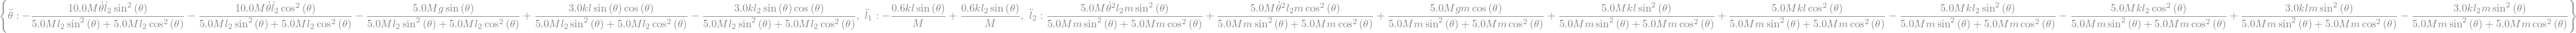

In [61]:
## Su codigo aqui

from sympy import sin, cos

x_pp=sym.Symbol("\ddot x",real=True)
y_pp=sym.Symbol("\ddot y",real=True)
m=sym.Symbol("m",real=True)
M=sym.Symbol("M",real=True)
k=sym.Symbol("k",real=True)
theta=sym.Symbol(r'\theta',real=True)
theta_p=sym.Symbol(r'\dot \theta',real=True)
theta_pp=sym.Symbol(r'\ddot \theta',real=True)
g=sym.Symbol("g",real=True)
fr=sym.Symbol("f_r",real=True)
l_1=sym.Symbol("l_1",real=True)
l_1_p=sym.Symbol("\dot l_1",real=True)
l_1_pp=sym.Symbol("\ddot l_1",real=True)
l_2=sym.Symbol("l_2",real=True)
l_2_p=sym.Symbol("\dot l_2",real=True)
l_2_pp=sym.Symbol("\ddot l_2",real=True)
l=sym.Symbol("l",real=True)
#dos_tercios=sym.Symbol(r'\frac{2}{3}')

ec1=-m*(l_1_pp + l_2_pp* sin(theta) + 2 *l_2_p *cos(theta) *theta_p - l_2* sin(theta)* (theta_p)**2 + l_2*cos(theta) *theta_pp) - k*(l_2 - l)*sin(theta)
ec2=-m * (- l_2_pp *cos(theta) + 2 * l_2_p *sin(theta)* theta_p + l_2* cos(theta)* (theta_p)**2 + l_2*sin(theta)* theta_pp)  - m*g + k*(l_2 - l) *cos(theta)
ec3=-M * l_1_pp + k*(l_2 - l) *sin(theta) - (2/3)*M * l_1_pp
#ec4=-fr +2/3*M * l_1_pp
#ec5=-x_pp +l_1_pp + l_2_pp* sin(theta) + 2 *l_2_p *cos(theta) *theta_p - l_2* sin(theta)* (theta_p)**2 + l_2*cos(theta) *theta_pp
#ec6= -y_pp - l_2_pp *cos(theta) + 2 * l_2_p *sin(theta)* theta_p + l_2* cos(theta)* (theta_p)**2 + l_2*sin(theta)* theta_pp

sol=sym.solve([ec1,ec2,ec3],theta_pp,l_1_pp,l_2_pp)
sym.simplify(sol)




## Problema 3

A partir de las ecuaciones de segundo grado del problema 1, resuelva las ecuaciones diferenciales anteriores con un tiempo total de 5 segundos y pasos $dt$ de 0.005 segundos, con el método de Runge-Kutta (de 4-to u 8-vo orden) y realice una simulación del movimiento, el resultado esperado debe verse como la siguiente simulación,

(Cambie el siguiente link de youtube por su simulación)

https://www.youtube.com/watch?v=JiHAw8IXkuU

Para la simulación use los siguientes parametros:

$l = 1 \text{ m}, \quad R = 0.2 \text{ m}, \quad l_1(t=0) = -1.5 \text{ m}, \quad l_2(t=0) = 1 \text{ m}, \quad \dot l_1(t=0) = 0.4 \text{ m/s}, \quad \dot l_2(t=0) = 0 \text{ m/s}, \quad m = 8 \text{ kg}, \quad M = 10 \text{ kg}, \quad k = 300 \text{ N/m}, \quad \theta(t=0)= 70^\circ, \quad \dot \theta(t=0)= 0 \text{ rad/s}, \quad dt = 0.005 \text{s}, \quad t_{\text{total}} = 5 \text{ s}$.

In [62]:

#parámetros
g_par = 9.8 # m/s^2
m_par = 8. # kg
M_par = 10. # kg
k_par = 300. # N/m
l_par = 1. # m longitud natural del resorte sin estirar
R_par = 0.2 # m radio de la esfera hueca
tiempo = 5 # s
puntos = int(tiempo*200) # numero de puntos a evaluar en la trayectoria

# condiciones iniciales
theta_init = 70. * np.pi/180. # angulo inicial respecto a la vertical (rad)
l1_init = -1.5 # m Posicion inicial de la masa M
l2_init = 1. # m longitud inicial del resorte
v1_init = 0.4 # m/s Velocidad inicial la masa M
v2_init = 0. # m/s Velocidad inicial la masa m
omega_init = 0.0 # velocidad angular inicial respecto a la vertical de la masa colgada (rad/s)


THETA_pp=sym.lambdify([M,theta,theta_p,l_2,l_2_p,l,k,g],sol[theta_pp])
L1_pp=sym.lambdify([M,theta,l_2,l,k],sol[l_1_pp])
L2_pp=sym.lambdify([M,m,theta,theta_p,l_2,l,k,g],sol[l_2_pp])

def f1(theta,omega,t,l_2,v_2):
  return THETA_pp(M_par,theta,omega,l_2,v_2,l_par,k_par,g_par)

def f2(l_1,v_1,t,l_2,theta):
  return L1_pp(M_par,theta,l_2,l_par,k_par)

def f3(l_2,v_2,t,theta,omega):
  return L2_pp(M_par,m_par,theta,omega,l_2,l_par,k_par,g_par)


def rgk4(f1, f2, f3, theta0, omega0, l_10, v_10, l_20, v_20, t0, tf, h):
  thetas = [theta0]
  omegas=[omega0]

  l_1s = [l_10]
  v_1s=[v_10]

  l_2s = [l_20]
  v_2s=[v_20]

  h_medios = h*0.5
  un_sexto = 1.0 / 6.0
  for t in np.arange(t0, tf, h):
    
    k1=h*omega0
    l1 = h * f1(theta0,omega0,t,l_20,v_20)

    m1=h*v_10
    n1 = h * f2(l_10,v_10,t,l_20,theta0)
    
    o1=h*v_20
    p1 = h * f3(l_20,v_20,t,theta0,omega0)
    

    k2=h*(omega0+0.5*l1)
    l2 = h * f1(theta0 + 0.5*k1,omega0+0.5*l1,t+h_medios,l_20+0.5*o1,v_20+0.5*p1)

    m2=h*(v_10+0.5*n1)
    n2=h * f2(l_10+0.5*m1,v_10+0.5*n1,t+h_medios,l_20+0.5*o1,theta0+0.5*k1)

    o2=h*(v_20+0.5*p1)
    p2=h * f3(l_20+0.5*o1,v_20+0.5*p1,t+h_medios,theta0+0.5*k1,omega0+0.5*l1)
    

    k3=h*(omega0+0.5*l2)
    l3 = h * f1(theta0 + 0.5*k2,omega0+0.5*l2,t+h_medios,l_20+0.5*o2,v_20+0.5*p2)

    m3=h*(v_10+0.5*n2)
    n3=h * f2(l_10+0.5*m2,v_10+0.5*n2,t+h_medios,l_20+0.5*o2,theta0+0.5*k2)

    o3=h*(v_20+0.5*p2)
    p3=h * f3(l_20+0.5*o2,v_20+0.5*p2,t+h_medios,theta0+0.5*k2,omega0+0.5*l2)
    
    
    k4=h*(omega0+l3)
    l4 = h * f1(theta0 + k3,omega0+l3,t+h_medios,l_20+o3,v_20+p3)

    m4=h*(v_10+n3)
    n4=h * f2(l_10+m3,v_10+n3,t+h_medios,l_20+o3,theta0+k3)

    o4=h*(v_20+p3)
    p4=h * f3(l_20+o3,v_20+p3,t+h_medios,theta0+k3,omega0+l3)    
    
    #k4=h*(dx0+l3)
    #l4 =h * f(x0 + k3,dx0+l3,t+h)
    
    theta1 = theta0 + un_sexto*(k1 + 2*k2 + 2*k3 + k4)
    thetas.append(theta1)
    theta0 = theta1

    omega1 = omega0 + un_sexto*(l1+2*l2+2*l3+l4)
    omegas.append(omega1)
    omega0=omega1

    l_11 = l_10 + un_sexto*(m1+2*m2+2*m3+m4)
    l_1s.append(l_11)
    l_10=l_11

    v_11 = v_10 + un_sexto*(n1+2*n2+2*n3+n4)
    v_1s.append(v_11)
    v_10=v_11

    l_21 = l_20 + un_sexto*(o1+2*o2+2*o3+o4)
    l_2s.append(l_21)
    l_20=l_21

    v_21 = v_20 + un_sexto*(p1+2*p2+2*p3+p4)
    v_2s.append(v_21)
    v_20=v_21


      
  return np.linspace(t0,tf,len(thetas)), np.array(thetas), np.array(l_1s), np.array(l_2s)



t,theta_arr,l_1_arr,l_2_arr=rgk4(f1,f2,f3,theta_init,omega_init,l1_init,v1_init,l2_init,v2_init,0,5,0.005)




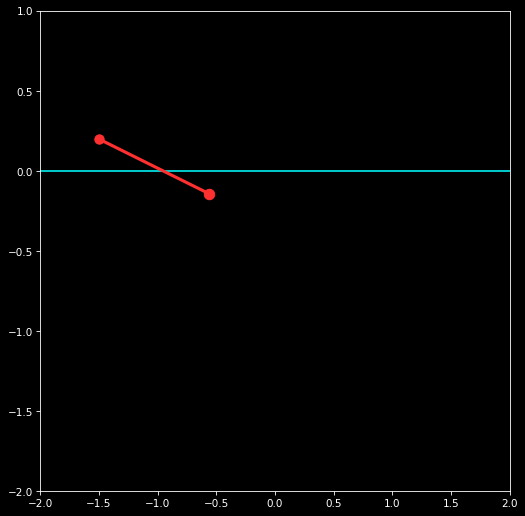

In [63]:
## su simulación aqui
x1=l_1_arr
y1=np.zeros(len(x1))
y1[:]=R_par
x2=x1+l_2_arr*np.sin(theta_arr)
y2=y1-l_2_arr*np.cos(theta_arr)

data=np.array([x1,y1,x2,y2])
#"""
###
fps = 24 # fotogramas por segundo

def update(num_frame,d,elements,paso):
  j = num_frame * paso
  masa1, masa2, brazo2, trayectoria2 = elements#brazo1, brazo2, trayectoria2 = elements
  trayectoria2.set_data(d[2:4, :j+1])
  masa1.set_offsets(d[0:2, j:j+1].T)
  masa2.set_offsets(d[2:4, j:j+1].T)
  #brazo1.set_data([0, d[0, j]], [0, d[1, j]])
  brazo2.set_data([d[0, j], d[2, j]], [d[1, j], d[3, j]])

def inicializar_elementos_graficos(d,m1,m2,ax):
  masa1 = ax.scatter(d[0, :1], d[1, :1] ,s=80,c='#ff3030')
  masa2 = ax.scatter(d[2, :1], d[3, :1] ,s=80*m2/m1,c='#ff3030')
  #brazo1, = ax.plot([0, d[0, 0]], [0, d[1, 0]],c='#ff3030',lw=3)
  brazo2, = ax.plot([d[0, 0],d[2, 0]],[d[1, 0],d[3, 0]],c='#ff3030',lw=3)
  trayectoria2, = ax.plot(d[2, :1], d[3, :1],c='#34abeb',zorder=-1)
  return masa1, masa2,  brazo2, trayectoria2#brazo1, brazo2, trayectoria2

def ajustar_ejes_coordenados(l1,l2):
  fig = plt.figure(figsize = (7,7), dpi = 75)
  fig.subplots_adjust(left=0, right=1, bottom=0, top=1) #margen
  ax = fig.gca()
  plt.tight_layout()
  plt.xlim(-2,2)
  plt.ylim(-2,1)
  plt.axhline(y=0,color="cyan")
  #plt.xlim([-l1 - l2, l1 + l2])
  #plt.ylim([-l1 - l2, l1 + l2])
  return fig, ax

def crear_animacion(data, l1, l2, m1, m2, time, fps, name):
  N = time*fps
  paso = int(np.floor(data.shape[1] / N))
  if paso<1: raise ValueError('Escoje puntos > '+ str(N))
  fig, ax = ajustar_ejes_coordenados(l1,l2)
  elements = inicializar_elementos_graficos(data,m1,m2,ax)
  ani = animation.FuncAnimation(fig,update,N,fargs=(data,elements,paso))
  return ani
#"""
###
#plt.plot(x2,y2)
#plt.show()
start_time = time.time()
crear_animacion(data, 0, l_par, m_par, M_par, tiempo,fps,'sistema_pendulo_resorte_cuerporigido.gif')
#print("Tiempo usado en crear la animación (s):",time.time() - start_time)

In [64]:
# use el siguiente codigo para evaluar el tiempo de su simulacion

print("Tiempo usado en crear la animación (s):",time.time() - start_time)

Tiempo usado en crear la animación (s): 4.28058123588562
